In [26]:
import pandas as pd

In [27]:

df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [28]:
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [29]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [30]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [31]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [34]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [36]:

df['v1'].value_counts()


,count
v1,
ham,4825
spam,747


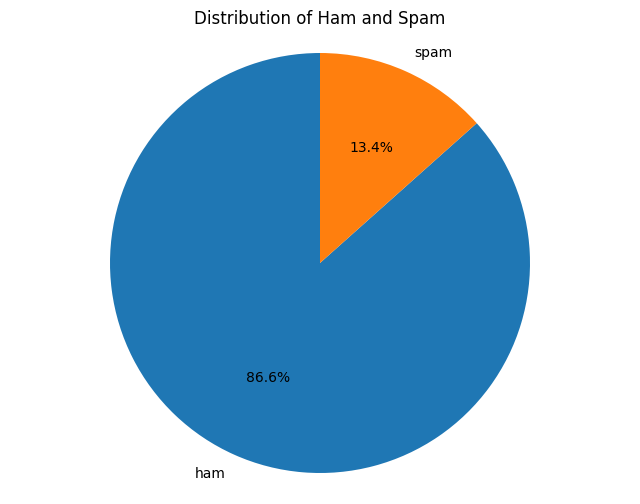

In [37]:
# prompt: generate pie chart of ham and spam

import matplotlib.pyplot as plt

# Assuming 'df' and 'v1' column from your previous code
ham_spam_counts = df['v1'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(ham_spam_counts, labels=ham_spam_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ham and Spam')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [38]:
import matplotlib.pyplot as plt


In [39]:
import seaborn as sns

In [40]:
labels_df=df['v1'].value_counts().index

In [41]:
values_df=df['v1'].value_counts().values


([<matplotlib.patches.Wedge at 0x7ea4275bbb90>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '87%'),
  Text(0.5475662588910611, -0.24529816983428027, '13%')])

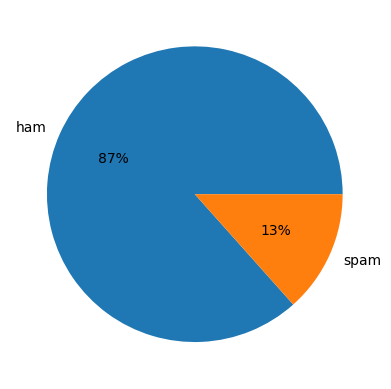

In [42]:
plt.pie(values_df,labels=labels_df,autopct='%1.0f%%')



<Axes: xlabel='v1', ylabel='count'>

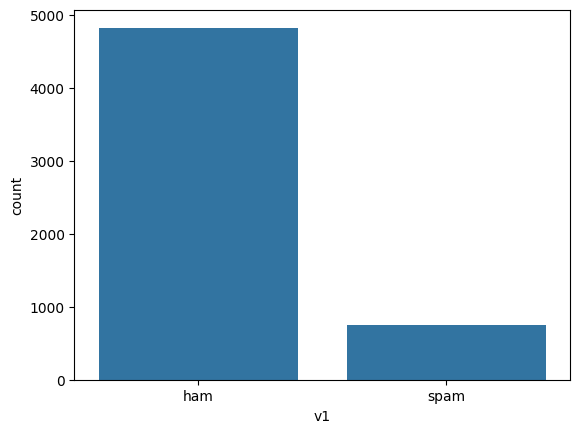

In [43]:
sns.countplot(x=df['v1'])


In [44]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 5572
Number of columns: 2


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vectorizer = CountVectorizer()


In [47]:
X = vectorizer.fit_transform(df['v2'])

In [48]:
df.shape

(5572, 2)

In [49]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [50]:
X.shape

(5572, 8672)

In [51]:
from collections import Counter

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sm = SMOTE(random_state=42)


In [54]:
y=df['v1']

In [55]:
x_res, y_res = sm.fit_resample(X, y)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
y_res=le.fit_transform(y_res)

In [58]:
 from sklearn.naive_bayes import MultinomialNB
 clf=MultinomialNB()
 clf.fit(x_res,y_res)

MultinomialNB()

In [59]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

# Assuming 'df' is your DataFrame from previous code snippets
# ... (your previous code to load and preprocess 'df')

# Create CountVectorizer and transform the 'v2' column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['v2'])

# Apply SMOTE for oversampling
sm = SMOTE(random_state=42)
y = df['v1']  # Define 'y' before using it in SMOTE
x_res, y_res = sm.fit_resample(X, y)

# Apply Label Encoding to 'y_res'
le = LabelEncoder()
y_res = le.fit_transform(y_res)

# Create and train the MultinomialNB classifier
clf = MultinomialNB()
clf.fit(x_res, y_res)  # Now 'x_res' and 'y_res' are defined

MultinomialNB()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.33,random_state=42)

In [62]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [63]:
y_pred=clf.predict(x_test)

In [64]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [66]:
from sklearn.metrics import accuracy_score # Corrected module name from sklearn.matrics to sklearn.metrics


In [67]:
accuracy_score(y_pred,y_test)

0.9766839378238342

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


In [69]:
from sklearn.metrics import confusion_matrix


In [71]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

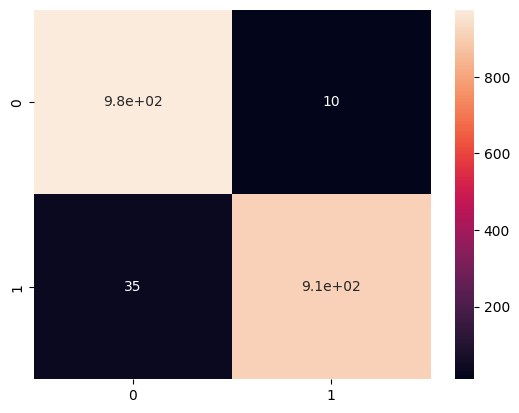

In [72]:
sns.heatmap(cm,annot=True)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       985
           1       0.99      0.96      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

